In [ ]:
# Herkese merhaba, bu projede 611bin satırlık bir market satış veriseti üzerinde 
# bir RFM analizi yaparak müşterilerimizi segmentlere ayıracağız.
# RFM analizinden sonra müşteri yaşam boyu değerini hesaplayıp birde o şekilde bir segmente işlemi yapacağız.
# Haydi başlayalım...

In [45]:
# İlk olarak kütüphanelerimizi import ediyoruz.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [28]:
# Daha sonra verisetimizi import ediyor ve ilk 5 satırını görüntülüyoruz.

df = pd.read_excel('datasets/MarketSales.xlsx')
df.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [32]:
df_ = df.copy()

In [33]:
# Verisetimizin içeriğini kontrol ediyoruz.

df_.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [34]:
# Verisetimizde çok fazla sütun olduğundan dolayı RFM metriklerini hesaplamak için ihtiyacımız olanları alıyoruz.

df_ = df[['ITEMNAME','FICHENO','DATE_','AMOUNT','PRICE','CLIENTCODE']]

In [36]:
# Verisetimizin son halinin ilk 5 satırını görüntülüyoruz.

df_.head()

,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,CLIENTCODE
0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,467369
1,TOZ SEKER,18105,2017-01-06,5.0,2.65,131464
2,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969
3,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969
4,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,447336


In [37]:
# Sütun isimlerini değiştiriyoruz

df_.columns = ['ProductName', 'Invoice', 'Date', 'Amount', 'Price', 'CustomerID']

In [38]:
# Son haline bir kez daha bakıyoruz.

df_.head()

,ProductName,Invoice,Date,Amount,Price,CustomerID
0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,467369
1,TOZ SEKER,18105,2017-01-06,5.0,2.65,131464
2,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969
3,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969
4,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,447336


In [39]:
# Monetary değerini hesaplamak için toplam alışveri tutarının yer aldığı bir sütun ekliyoruz.

df_['TotalPrice'] = df_['Amount'] * df_['Price']

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_18280\2118516237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TotalPrice'] = df_['Amount'] * df_['Price']


In [41]:
df_.head()

,ProductName,Invoice,Date,Amount,Price,CustomerID,TotalPrice
0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,467369,2.00
1,TOZ SEKER,18105,2017-01-06,5.0,2.65,131464,13.25
2,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969,0.40
3,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969,0.40
4,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,447336,0.40


In [66]:
df_.isnull().sum()

ProductName     7167
Invoice            0
Date               1
Amount             1
Price              1
CustomerID     18348
TotalPrice         1
dtype: int64

In [67]:
df_.dropna(inplace=True)

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_18280\895039593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(inplace=True)


In [68]:
# Eşsiz müşteri sayımıza bakıyoruz.

df_.isnull().sum()

ProductName    0
Invoice        0
Date           0
Amount         0
Price          0
CustomerID     0
TotalPrice     0
dtype: int64

In [69]:
# Verinin tarihleri eski olduğu için recency değerini hesaplarken günümüz tarihinde farklı değerler çıkacağı için,
# analiz tarihimizi son tarihten 2 gün sonrası olarak belirliyoruz.

df_['Date'].max()

Timestamp('2017-03-31 00:00:00')

In [70]:
today = dt.datetime(2017,4,2)

## RFM Analizi

In [71]:
# RFM analizi için müşterimizin recency,frequency ve monetary değerlerini hesaplıyoruz.

rfm = df_.groupby('CustomerID').agg({'Date' : lambda Date : (today-Date.max()).days,
                                    'Invoice' : lambda Invoice : Invoice.nunique(),
                                   'TotalPrice': lambda TotalPrice : TotalPrice.sum()
                                   })

In [72]:
rfm.head()

,Date,Invoice,TotalPrice
CustomerID,,,
1,33,4,115.58950
10,18,2,4.25000
100,76,2,297.81975
1000,42,2,31.28600
1000035,41,1,16.00000


In [73]:
rfm.columns = ['recency','frequency','monetary']

In [74]:
rfm

,recency,frequency,monetary
CustomerID,,,
1,33,4,115.58950
10,18,2,4.25000
100,76,2,297.81975
1000,42,2,31.28600
1000035,41,1,16.00000
...,...,...,...
999955,4,2,19.35275
999965,52,1,1.00000
999966,31,3,48.58905


In [75]:
# RFM metriklerini hesapladıktan sonra RFM skorlarımızı oluşturuyoruz.

rfm['recency_score'] = pd.qcut(rfm['recency'],5, labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'),5, labels=[1,2,3,4,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'],5, labels = [1,2,3,4,5])

In [76]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
1,33,4,115.58950,2,4,5
10,18,2,4.25000,3,2,1
100,76,2,297.81975,1,2,5
1000,42,2,31.28600,2,2,3
1000035,41,1,16.00000,2,1,2


In [77]:
# RFM skorlarını da oluşturduktan sonra segmentasyon için RF skorlarını yazdırıyor ve bu skorlara göre segmentleri oluşturuyoruz

rfm['RFM_score'] = rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str)

In [78]:
# Görüldüğü gibi 49316 adet müşteri için RF skorları oluşturuldu.

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
CustomerID,,,,,,,
1,33,4,115.58950,2,4,5,24
10,18,2,4.25000,3,2,1,32
100,76,2,297.81975,1,2,5,12
1000,42,2,31.28600,2,2,3,22
1000035,41,1,16.00000,2,1,2,21


In [79]:
# Şimdi ise RF skorlarına istinaden segmentleri oluşturuyoruz.

segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At_risk',
    r'[1-2]5' : 'Cant_loose',
    r'3[1-2]' : 'About_the_sleep',
    r'33' : 'Need_attention',
    r'[3-4][4-5]' : 'Loyal_customers',
    r'41' : 'Promising',
    r'51' : 'New_customers',
    r'[4-5][2-3]' : 'Potential_loyalists',
    r'5[4-5]' : 'Champions'
}

In [80]:
rfm['segment'] = rfm['RFM_score'].replace(segment_map, regex=True)

In [81]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
CustomerID,,,,,,,,
1,33,4,115.58950,2,4,5,24,At_risk
10,18,2,4.25000,3,2,1,32,About_the_sleep
100,76,2,297.81975,1,2,5,12,Hibernating
1000,42,2,31.28600,2,2,3,22,Hibernating
1000035,41,1,16.00000,2,1,2,21,Hibernating


In [82]:
# Müşterileri segmentasyona ayırdıktan sonra recency, frequency ve monetary üzerinden inceliyor ve yorumluyoruz.

rfm[['segment','recency','frequency','monetary']].groupby('segment').agg({'mean','count'})

recency        frequency          monetary       
                          mean  count      mean  count       mean  count
segment                                                                 
About_the_sleep      23.022786   3072  1.554688   3072  25.599719   3072
At_risk              44.185128   6509  2.838992   6509  49.694537   6509
Cant_loose           38.852147   1630  4.687730   1630  83.136765   1630
Champions             4.896286   5843  4.493411   5843  76.634451   5843
Hibernating          54.106025  11337  1.372409  11337  23.215911  11337
Loyal_customers      16.917875   9449  4.253678   9449  73.465463   9449
Need_attention       22.902874   2018  2.607037   2018  46.248628   2018
New_customers         4.976852    864  1.000000    864  16.592420    864
Potential_loyalists   9.270143   7459  2.330875   7459  41.510606   7459
Promising            13.024007   1083  1.000000   1083  17.111268   1083

In [120]:
rfm.to_csv('rfm.csv')

In [129]:
rfm = rfm.reset_index()
rfm

,index,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
0,0,1,33,4,115.58950,2,4,5,24,At_risk
1,1,10,18,2,4.25000,3,2,1,32,About_the_sleep
2,2,100,76,2,297.81975,1,2,5,12,Hibernating
3,3,1000,42,2,31.28600,2,2,3,22,Hibernating
4,4,1000035,41,1,16.00000,2,1,2,21,Hibernating
...,...,...,...,...,...,...,...,...,...,...
49259,49259,999955,4,2,19.35275,5,3,2,53,Potential_loyalists
49260,49260,999965,52,1,1.00000,1,2,1,12,Hibernating
49261,49261,999966,31,3,48.58905,2,4,4,24,At_risk
49262,49262,999995,9,8,120.50400,4,5,5,45,Loyal_customers


In [131]:
rfm = rfm.drop('index', axis =1)

In [137]:
segment_count = rfm.groupby('segment').agg ({'CustomerID':'count'})

segment_count.reset_index()

,segment,CustomerID
0,About_the_sleep,3072
1,At_risk,6509
2,Cant_loose,1630
3,Champions,5843
4,Hibernating,11337
5,Loyal_customers,9449
6,Need_attention,2018
7,New_customers,864
8,Potential_loyalists,7459
9,Promising,1083


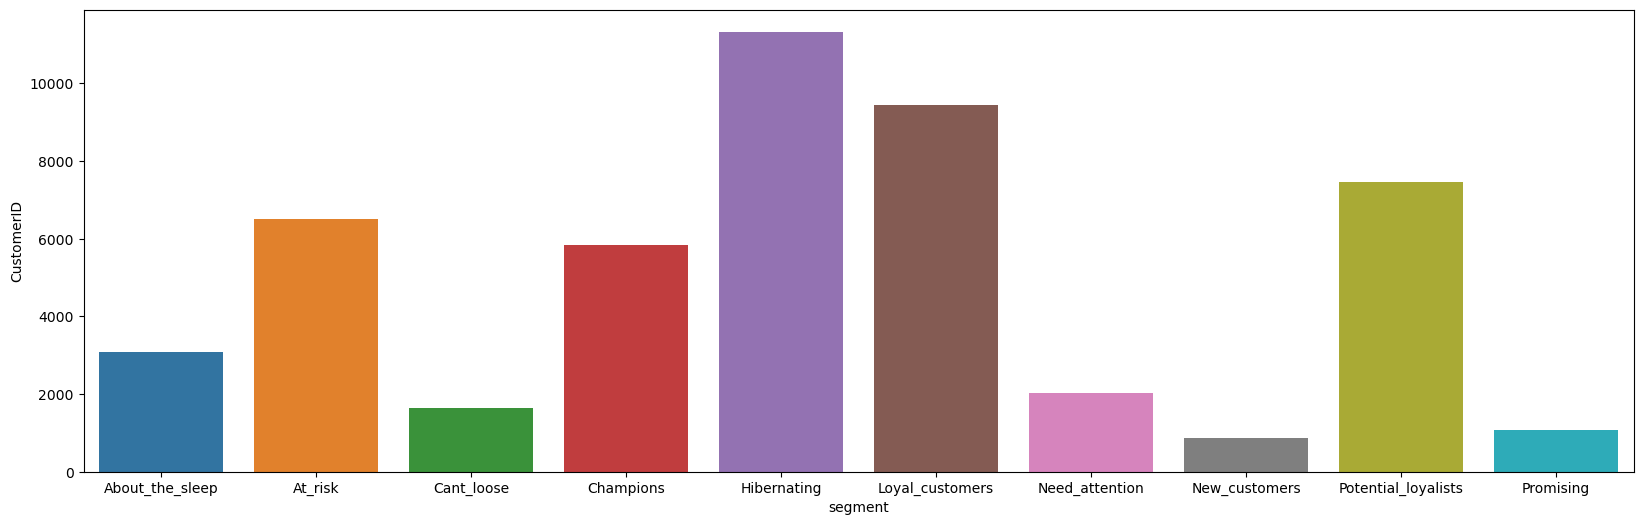

In [142]:
plt.figure(figsize=(20, 6))
sns.barplot(x=segment_count.index, y=segment_count['CustomerID'])
plt.show()

## Müşteri Yaşam Boyu Değeri

In [ ]:
# 2. Average Order Value (average_order_value = total_price / total_transaction)
# 3. Purchase Frequency (total_transaction / total_number_of_customers)
# 4. Repeat Rate & Churn Rate (birden fazla alışveriş yapan müşteri sayısı / tüm müşteriler)
# 5. Profit Margin (profit_margin =  total_price * 0.10)
# 6. Customer Value (customer_value = average_order_value * purchase_frequency)
# 7. Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)

In [84]:
df_.isnull().sum()

ProductName    0
Invoice        0
Date           0
Amount         0
Price          0
CustomerID     0
TotalPrice     0
dtype: int64

In [85]:
df_

,ProductName,Invoice,Date,Amount,Price,CustomerID,TotalPrice
0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,467369,2.00
1,TOZ SEKER,18105,2017-01-06,5.0,2.65,131464,13.25
2,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969,0.40
3,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,656969,0.40
4,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,447336,0.40
...,...,...,...,...,...,...,...
611103,EKMEK 250 GR,134656,2017-03-18,1.0,0.90,374191,0.90
611104,EKMEK 250 GR,134630,2017-03-18,1.0,0.90,656248,0.90
611105,EKMEK 250 GR,130100,2017-03-15,1.0,0.90,78643,0.90
611106,EKMEK 250 GR,134762,2017-03-18,1.0,0.90,926041,0.90


In [86]:
df_ = df_.drop('ProductName', axis=1)

In [87]:
df_

,Invoice,Date,Amount,Price,CustomerID,TotalPrice
0,18456,2017-01-07,1.0,2.00,467369,2.00
1,18105,2017-01-06,5.0,2.65,131464,13.25
2,18350,2017-01-03,1.0,0.40,656969,0.40
3,18350,2017-01-03,1.0,0.40,656969,0.40
4,18005,2017-01-05,1.0,0.40,447336,0.40
...,...,...,...,...,...,...
611103,134656,2017-03-18,1.0,0.90,374191,0.90
611104,134630,2017-03-18,1.0,0.90,656248,0.90
611105,130100,2017-03-15,1.0,0.90,78643,0.90
611106,134762,2017-03-18,1.0,0.90,926041,0.90


In [89]:
# Müşteri yaşam boyu değeri için gerekli olan metrikleri hesaplıyoruz.
# İlk olarak eşsiz fatura adetlerini, sonra müşterinin bugüne kadar bizden kaç birim alışveriş yaptığını
# ve son olarakta müşterinin bize parasal olarak kazandırdığı miktarı buluyoruz.

cltv = df_.groupby('CustomerID').agg({'Invoice' : lambda Invoice : Invoice.nunique(),
                                      'Amount' : lambda Amount : Amount.sum(),
                                      'TotalPrice' : lambda TotalPrice : TotalPrice.sum()
                                      })

In [91]:
cltv.columns = ['total_transacion','total_unit','total_price']

In [92]:
cltv.head()

,total_transacion,total_unit,total_price
CustomerID,,,
1,4,26.438,115.58950
10,2,2.000,4.25000
100,2,25.759,297.81975
1000,2,7.320,31.28600
1000035,1,2.000,16.00000


In [93]:
# 1. Avg order value bulunması

cltv['avg_order_value'] = cltv['total_price'] / cltv['total_transacion']

In [94]:
cltv.head()

,total_transacion,total_unit,total_price,avg_order_value
CustomerID,,,,
1,4,26.438,115.58950,28.897375
10,2,2.000,4.25000,2.125000
100,2,25.759,297.81975,148.909875
1000,2,7.320,31.28600,15.643000
1000035,1,2.000,16.00000,16.000000


In [95]:
cltv.shape

(49264, 4)

In [96]:
# 2. purchase frequency değeri bulunması, bunu hesaplamak adına bir üst satırda toplam müşteri sayımıza bakıyoruz.

cltv['purchase_frequency'] = cltv['total_transacion'] / cltv.shape[0]

In [97]:
cltv.head()

,total_transacion,total_unit,total_price,avg_order_value,purchase_frequency
CustomerID,,,,,
1,4,26.438,115.58950,28.897375,0.000081
10,2,2.000,4.25000,2.125000,0.000041
100,2,25.759,297.81975,148.909875,0.000041
1000,2,7.320,31.28600,15.643000,0.000041
1000035,1,2.000,16.00000,16.000000,0.000020


In [101]:
cltv[cltv['total_transacion']>1].shape[0]

(38681, 5)

In [103]:
# repeat rate ve churn rate hesaplanması, bunun içinde 1 den fazla alışveriş yapan müşterleri buluyoruz.

# İlk olarak repeat_rate hesaplıyoruz.

repeat_rate = cltv[cltv['total_transacion']>1].shape[0] / cltv.shape[0]
repeat_rate

0.7851778174732056

In [104]:
# Repeat rate bulunduktan sonra churn rate hesaplayabiliriz.

churn_rate = 1 - repeat_rate
churn_rate

0.21482218252679441

In [107]:
# Şimdide profit margin değerini hesaplıyoruz.

cltv['profit_margin'] = cltv['total_price']*0.1

In [108]:
cltv.head()

,total_transacion,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin
CustomerID,,,,,,
1,4,26.438,115.58950,28.897375,0.000081,11.558950
10,2,2.000,4.25000,2.125000,0.000041,0.425000
100,2,25.759,297.81975,148.909875,0.000041,29.781975
1000,2,7.320,31.28600,15.643000,0.000041,3.128600
1000035,1,2.000,16.00000,16.000000,0.000020,1.600000


In [109]:
# Şimdi ise sıra müşteri değerini hesaplamaya geldi, bunun için, avg_order_value ile purchase_frequency değerini çarpıyoruz.

cltv['customer_value'] = cltv['avg_order_value'] * cltv['purchase_frequency']

In [110]:
cltv.head()

,total_transacion,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value
CustomerID,,,,,,,
1,4,26.438,115.58950,28.897375,0.000081,11.558950,0.002346
10,2,2.000,4.25000,2.125000,0.000041,0.425000,0.000086
100,2,25.759,297.81975,148.909875,0.000041,29.781975,0.006045
1000,2,7.320,31.28600,15.643000,0.000041,3.128600,0.000635
1000035,1,2.000,16.00000,16.000000,0.000020,1.600000,0.000325


In [115]:
# Tüm metrikler hesaplandıktan sonra müşteri yaşam boyu değerini hesaplayabiliriz.

cltv['customer_lifetime_value'] = (cltv['customer_value']/churn_rate)*cltv['profit_margin']
cltv.sort_values('customer_lifetime_value', ascending=False)

,total_transacion,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,customer_lifetime_value
CustomerID,,,,,,,,
854889,2,241.490,8562.48600,4281.243000,0.000041,856.248600,1.738082e-01,6.927730e+02
9010,4,1031.978,5609.18940,1402.297350,0.000081,560.918940,1.138598e-01,2.972976e+02
237685,2,7.938,2175.98040,1087.990200,0.000041,217.598040,4.416979e-02,4.474053e+01
659570,4,644.242,1793.19615,448.299037,0.000081,179.319615,3.639973e-02,3.038413e+01
808718,3,99.907,1560.63180,520.210600,0.000061,156.063180,3.167895e-02,2.301400e+01
...,...,...,...,...,...,...,...,...
283887,1,1.000,0.20000,0.200000,0.000020,0.020000,4.059760e-06,3.779647e-07
690105,1,0.010,0.04100,0.041000,0.000020,0.004100,8.322507e-07,1.588396e-08
1022650,1,2.000,0.02000,0.020000,0.000020,0.002000,4.059760e-07,3.779647e-09


In [114]:
cltv.describe().T

,count,mean,std,min,25%,50%,75%,max
total_transacion,49264.0,2.791024,1.493747,1.000000e+00,2.000000,3.000000,4.000000,11.000000
total_unit,49264.0,15.112693,17.073496,1.000000e-02,5.000000,10.169500,19.587000,1031.978000
total_price,49264.0,48.282534,72.987616,2.000000e-02,13.450000,30.850000,62.099438,8562.486000
avg_order_value,49264.0,17.253954,29.366560,2.000000e-02,6.479478,11.640000,20.429237,4281.243000
purchase_frequency,49264.0,0.000057,0.000030,2.029880e-05,0.000041,0.000061,0.000081,0.000223
profit_margin,49264.0,4.828253,7.298762,2.000000e-03,1.345000,3.085000,6.209944,856.248600
customer_value,49264.0,0.000980,0.001482,4.059760e-07,0.000273,0.000626,0.001261,0.173808
customer_lifetime_value,49264.0,0.072364,3.411355,3.779647e-09,0.001709,0.008993,0.036439,692.772999


In [116]:
# Tüm metrikler hesaplandıktan sonra müşterileri yaşam boyu değerine göre segmentlere ayırabiliriz.

cltv['segment'] = pd.qcut(cltv['customer_lifetime_value'],4,labels=['D','C','B','A'])

In [118]:
cltv.groupby('segment').agg({'count','mean'})

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_18280\3892145393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv.groupby('segment').agg({'count','mean'})


total_transacion        total_unit        total_price         \
                    mean  count       mean  count        mean  count   
segment                                                                
D               1.558406  12319   3.593026  12319    6.772844  12319   
C               2.467073  12315   8.411934  12315   21.578592  12315   
B               3.184262  12314  14.764033  12314   44.488297  12314   
A               3.954693  12316  33.683985  12316  120.297728  12316   

        avg_order_value        purchase_frequency        profit_margin         \
                   mean  count               mean  count          mean  count   
segment                                                                         
D              4.728783  12319           0.000032  12319      0.677284  12319   
C             10.511826  12315           0.000050  12315      2.157859  12315   
B             16.896774  12314           0.000065  12314      4.448830  12314   
A             36.880879  12316           0.000080  12316     12.029773  12316   

        customer_value        customer_lifetime_value         
                  mean  count                    mean  count  
segment                                                       
D             0.000137  12319                0.000568  12319  
C             0.000438  12315                0.004636  12315  
B             0.000903  12314                0.019454  12314  
A             0.002442  12316                0.264802  12316

In [147]:
# Analizi bitirdikten sonra metrileri bir csv dosyasına çıktı alabiliriz.

cltv.to_csv('cltv.csv')

In [150]:
cltv = cltv.reset_index()

In [151]:
cltv.head()

,CustomerID,total_transacion,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,customer_lifetime_value,segment
0,1,4,26.438,115.58950,28.897375,0.000081,11.558950,0.002346,0.126249,A
1,10,2,2.000,4.25000,2.125000,0.000041,0.425000,0.000086,0.000171,D
2,100,2,25.759,297.81975,148.909875,0.000041,29.781975,0.006045,0.838105,A
3,1000,2,7.320,31.28600,15.643000,0.000041,3.128600,0.000635,0.009249,B
4,1000035,1,2.000,16.00000,16.000000,0.000020,1.600000,0.000325,0.002419,C


In [152]:
cltv_count = cltv.groupby('segment').agg({'CustomerID':'count'})

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_18280\2101732617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_count = cltv.groupby('segment').agg({'CustomerID':'count'})


In [153]:
cltv_count

,CustomerID
segment,
D,12319
C,12315
B,12314
A,12316


C:\Users\Ahmet\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


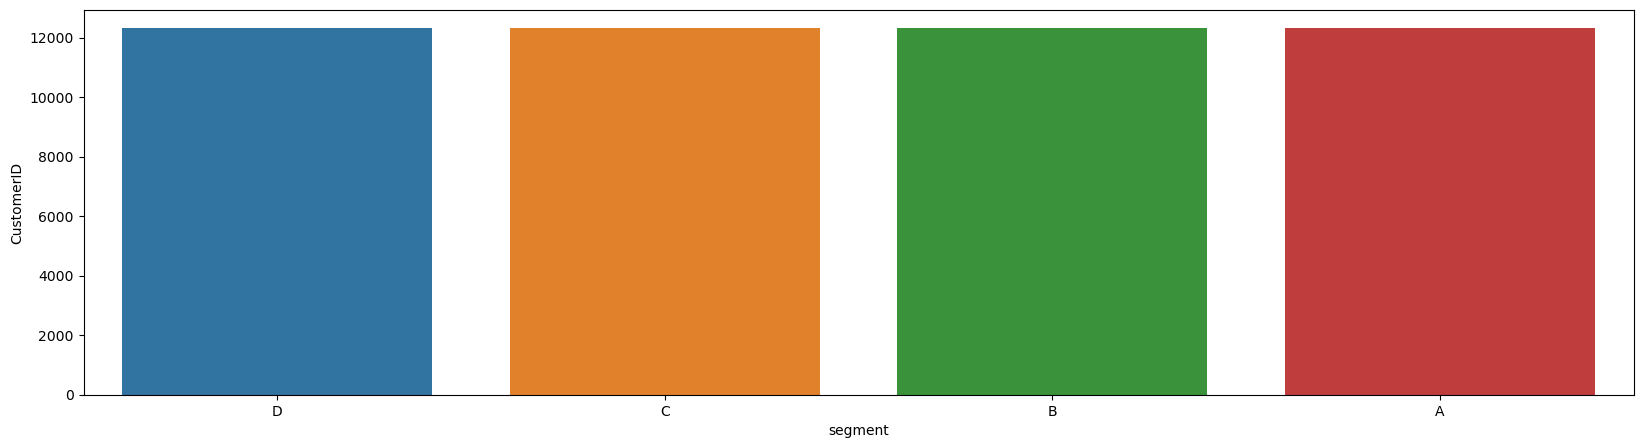

In [154]:
plt.figure(figsize=(20,5))
sns.barplot(x=cltv_count.index, y=cltv_count['CustomerID'], data=cltv_count)
plt.show()